In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
datasig=pd.read_csv("sig_many_values.csv")
databkg=pd.read_csv("bkg_many_values.csv")

In [3]:
datasig.shape

(67263, 34)

In [4]:
databkg.shape

(84499, 34)

In [5]:
datasig["label"]=1
databkg["label"]=0

In [6]:
data2=datasig.append(databkg,ignore_index=True)

In [7]:
data2.shape


(151762, 35)

In [8]:
data2.head()

,jetPt_1,jetEta_1,jetPhi_1,jetE_1,btag_1,jetPt_2,jetEta_2,jetPhi_2,jetE_2,btag_2,...,jetPt_6,jetEta_6,jetPhi_6,jetE_6,btag_6,diPhoPhi,diPhoEta,diPhoPtoM,weight,label
0,179.1340,0.129419,-0.770991,184.053,0.920134,75.2335,-0.047224,-1.281490,76.1059,0.999764,...,37.2568,-0.299217,-1.762450,39.8590,0.032036,1.47030,0.659044,1.629320,0.000071,1
1,161.2780,1.071580,-0.156882,263.612,0.913174,126.8670,0.646219,2.747790,155.3490,0.999908,...,30.6574,1.363930,-0.648138,64.0560,0.032292,-3.10210,1.074770,0.598067,0.000073,1
2,157.1970,-0.333851,0.212655,166.653,0.005083,68.6658,-1.467650,0.122107,157.2250,0.999957,...,50.2075,-0.554880,3.135870,58.4124,0.956340,2.64547,-0.449345,1.746590,0.000053,1
3,143.9920,-0.899087,-0.825905,206.971,0.993589,112.7960,0.119058,0.629660,114.7540,0.132374,...,30.1873,-0.606200,0.356470,36.3707,0.217502,2.49579,-0.719844,2.053300,0.000010,1
4,85.5433,0.699251,-2.586590,108.438,0.999996,74.1270,0.099549,-0.422806,75.8854,0.054680,...,33.7513,-1.301440,2.364960,66.7972,0.059545,2.53021,-1.809120,0.284786,0.000089,1


In [9]:
X=data2.iloc[:,:-2]
Y=data2.iloc[:,-1]
weights=data2.iloc[:,-2]

In [10]:
X_train, X_test, y_train, y_test,weight_train,weight_test = train_test_split(X, Y,weights, test_size=0.3, random_state=7)

In [11]:
X_train=np.asarray(X_train).astype('float32')
X_test=np.asarray(X_test).astype('float32')
y_train=np.asarray(y_train).astype('float32')
y_test=np.asarray(y_test).astype('float32')
weight_train=weight_train
weight_test=weight_test
weight_test=np.asarray(weight_test).astype("float32")
weight_train=np.asarray(weight_train).astype("float32")


In [12]:
weight_train

array([5.01296e-07, 7.53136e-05, 4.80751e-05, ..., 7.04554e-05,
       4.63276e-06, 7.76872e-05], dtype=float32)

In [13]:
ndim=X.shape[1]

In [14]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs=40,batch_size=512,validation_data=(X_test, y_test,weight_test),sample_weight=weight_train)

Instructions for updating:
Use tf.cast instead.
Train on 106233 samples, validate on 45529 samples
Epoch 1/40
106233/106233 [==============================] - 0s 4us/step - loss: 8.3213e-05 - acc: 0.5242 - val_loss: 5.0612e-05 - val_acc: 0.5607
Epoch 2/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.2102e-05 - acc: 0.5253 - val_loss: 5.3561e-05 - val_acc: 0.4616
Epoch 3/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.0723e-05 - acc: 0.5337 - val_loss: 4.8460e-05 - val_acc: 0.5739
Epoch 4/40
106233/106233 [==============================] - 0s 3us/step - loss: 4.9837e-05 - acc: 0.5391 - val_loss: 4.8874e-05 - val_acc: 0.5647
Epoch 5/40
106233/106233 [==============================] - 0s 2us/step - loss: 4.9262e-05 - acc: 0.5516 - val_loss: 4.9240e-05 - val_acc: 0.5263
Epoch 6/40
106233/106233 [==============================] - 0s 2us/step - loss: 4.8873e-05 - acc: 0.5580 - val_loss: 4.9324e-05 - val_acc: 0.5612
Epoch 7/40
106233/106233 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

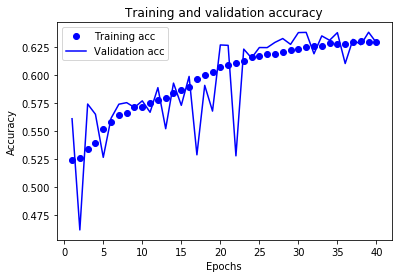

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(X_test, y_test,sample_weight=weight_test)
results

45529/45529 [==============================] - 0s 6us/step


[4.5845500189146e-05, 0.6285444441925448]

In [22]:
probs=model.predict(X_test)

In [23]:
from sklearn.metrics import roc_curve
y_pred_keras= model.predict_proba(X_test)
# keep probabilities for the positive outcome only
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,sample_weight=weight_test)

In [24]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)


0.6739725237978543


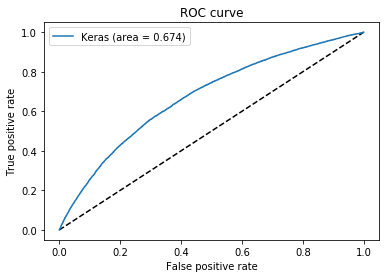

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

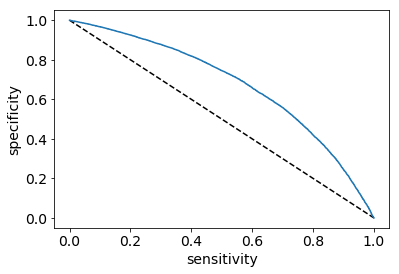

In [26]:
plt.figure(2)
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(tpr_keras, 1-fpr_keras, label='Keras:DNN')
plt.xlabel("sensitivity",fontsize=14)
plt.ylabel("specificity",fontsize=14)
plt.tick_params(axis="both",labelsize=14)
plt.show()

In [27]:
for kk in range(tpr_keras.size):
    if(round(tpr_keras[kk],4)==0.4000):
        spe=1-fpr_keras[kk]
        print(spe)

0.8190656190080621
0.8190656190080621
0.8190150943731562
0.8190150943731562
0.8190150943731562


In [28]:
filename="keras_tth.CSV"
with open(filename,"w") as file:
    for kk in range(tpr_keras.size):
        file.write(str(fpr_keras[kk]))
        file.write(" ")
        file.write(str(tpr_keras[kk]))
        file.write("\n")

In [29]:
sig_probs=[]
bkg_probs=[]
sig_weight=[]
bkg_weight=[]
for index in range(y_test.shape[0]):
    if(y_test[index]==1.0):
        sig_probs.append(probs[index][0])
        sig_weight.append(weight_test[index])
    else:
        bkg_probs.append(probs[index][0])
        bkg_weight.append(weight_test[index])
    

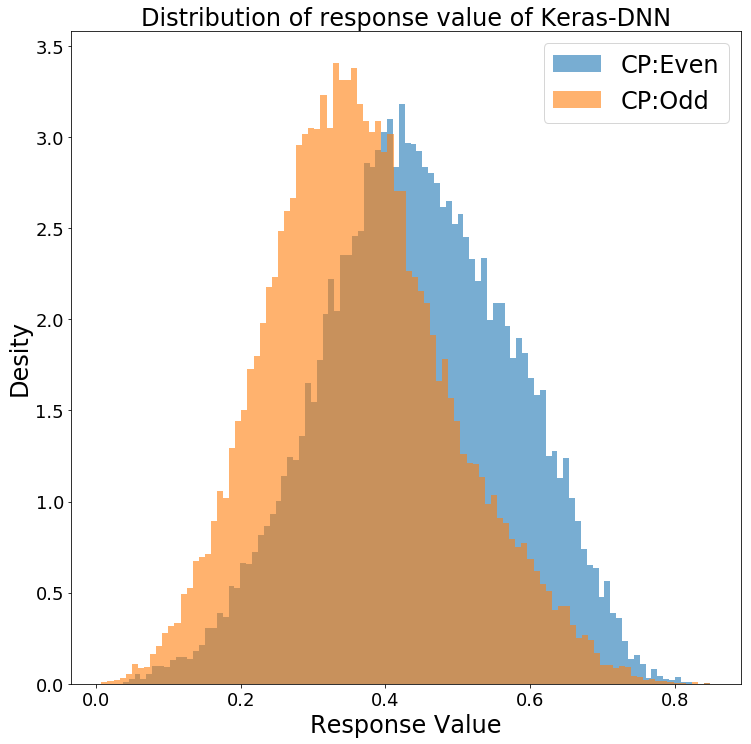

In [37]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [12, 12]

plt.hist(sig_probs,bins=100,density=True,alpha=0.6,label="CP:Even");
plt.hist(bkg_probs,bins=100,density=True,alpha=0.6,label="CP:Odd");
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Response Value",fontsize=24)
plt.title("Distribution of response value of DNN",fontsize=24)
plt.ylabel("Desity",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('tth_keras_output.png')
plt.show()

In [31]:
tpr_keras.size

45433

In [32]:
len(sig_probs)

20090

In [33]:
#write the response value as histogram into root file
from ROOT import TFile, TH1F
file=TFile("keras_DNN_hist.root","RECREATE")
h1=TH1F("sig","histo of signal",100,0,1)
h2=TH1F("bkg","histo of background",100,0,1)
for kk in range(len(sig_probs)):
    h1.Fill(sig_probs[kk],sig_weight[kk])
for kk in range(len(bkg_probs)):
    h2.Fill(bkg_probs[kk],bkg_weight[kk])
inte1=h2.Integral("width")
scale1=1/h1.Integral("width")
scale2=1/h2.Integral("width")
h1.Scale(scale1)
h2.Scale(scale2)
file.Write();
#By default the integral is computed as the sum of bin contents in the range. 
#if option "width" is specified, the integral is the sum of the bin contents multiplied by the bin width in x.



Welcome to JupyROOT 6.19/01
